In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from datetime import datetime, date, timedelta
date_start = date(2019,6,1)
date_end = date(2019,6,29)
num_days = (date_end-date_start).days
first_url = ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+(date_start).strftime('%y%m%d')+'.txt')
print(first_url)
df = pd.read_csv(first_url)
if num_days > 6:
    for i in range(num_days+1)[7::7]:
        url=('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+(date_start+timedelta(days=i)).strftime('%y%m%d')+'.txt')
        print(url)
        df = df.append(pd.read_csv(url), ignore_index=True)

http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt


In [3]:
df.head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,7072456,2396593
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,7072639,2396608
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,7072662,2396613
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,7072673,2396619
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,7072746,2396665


In [4]:
df.shape

(1027180, 11)

In [5]:
df = df.rename(index=str, columns={"EXITS                                                               ": "EXITS"})
df.head(1)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411


In [6]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

# Totals 

*Reminder: Check to make sure date and time are sorted.*

In [7]:
new_df = (df
          .set_index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC'])     
          .groupby(['C/A', 'UNIT', 'SCP', 'STATION'])
          .diff())
new_df = new_df.fillna(0)
new_df['TOTALS'] = new_df['ENTRIES'] + new_df['EXITS']
new_df = new_df.reset_index()
new_df.head(1)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,0.0,0.0,0.0


In [8]:
new_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'TOTALS'],
      dtype='object')

In [9]:
len(new_df['STATION'].unique())

378

*Reminder: Remove this?*

In [10]:
new_df.loc[new_df['DATE'] == '06/22/2019'].head(1)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
821217,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,217.0,34.0,251.0


In [11]:
##### new_df.sort_values(by=['TOTALS'], ascending=False)
print('Number of rows of enteries more than 5000: ', new_df[new_df.TOTALS>5000].TOTALS.count())
print('Number of rows of enteries more than 5000: ', new_df[new_df.ENTRIES>5000].ENTRIES.count())
print('Number of rows of exits more than 5000: ', new_df[new_df.EXITS>5000].EXITS.count())

Number of rows of enteries more than 5000:  54
Number of rows of enteries more than 5000:  24
Number of rows of exits more than 5000:  22


*Reminder: Remove this?*

In [12]:
new_df.shape

(1027180, 12)

*Reminder: Remove this?*

In [13]:
df.iloc[186980:187000].head(1)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
186980,R528,R097,00-00-03,JUNCTION BLVD,7,IRT,05/27/2019,04:00:00,REGULAR,6873255,2469754


In [14]:
#new_df = new_df.loc[new_df['TOTALS'] < 5000]
#new_df = new_df.loc[new_df['TOTALS'] >= 0]
#new_df = new_df.loc[new_df['EXITS'] >= 0]
#new_df = new_df.loc[new_df['ENTRIES'] >= 0]
#new_df = new_df.loc[(new_df.TOTALS < 5000) and (new_df.ENTRIES >= 0) and (new_df.EXITS >= 0)]
new_df = new_df.loc[(new_df.TOTALS < 5000) & (new_df.ENTRIES >= 0) & (new_df.EXITS >= 0)]
new_df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,0.0,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,14.0,4.0,18.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,20.0,28.0,48.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,79.0,57.0,136.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,239.0,55.0,294.0


In [15]:
new_df.shape

(1014259, 12)

In [16]:
new_df.describe().style.format("{:.1f}")

,ENTRIES,EXITS,TOTALS
count,1014259.0,1014259.0,1014259.0
mean,169.8,135.7,305.5
std,247.0,230.3,383.0
min,0.0,0.0,0.0
25%,9.0,8.0,29.0
50%,72.0,52.0,168.0
75%,233.0,164.0,444.0
max,3963.0,4753.0,4838.0


In [17]:
station_df = new_df.groupby('STATION', as_index=False)['TOTALS'].sum()
station_df = station_df.sort_values(by=['TOTALS'], ascending=False)
station_df

,STATION,TOTALS
61,34 ST-PENN STA,9675488.0
232,GRD CNTRL-42 ST,8229744.0
59,34 ST-HERALD SQ,6976839.0
352,TIMES SQ-42 ST,6039208.0
14,14 ST-UNION SQ,5922192.0
46,23 ST,5815950.0
225,FULTON ST,5382284.0
68,42 ST-PORT AUTH,5255872.0
110,86 ST,4708714.0
9,125 ST,4233560.0


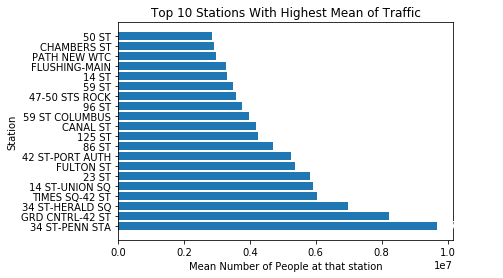

In [18]:
import matplotlib.pyplot as plt
import numpy as np
top_ten_station = station_df[0:20]
plt.barh(top_ten_station['STATION'],top_ten_station['TOTALS'])
plt.xlabel('Mean Number of People at that station')
plt.ylabel('Station')
plt.title('Top 10 Stations With Highest Mean of Traffic')
for i, v in enumerate(top_ten_station['TOTALS']):
    v = round(v,2)
    plt.text(v-500, i-0.2, str(v), color='white', fontweight='bold')

# Timestamp

In [19]:
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,0.0,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,14.0,4.0,18.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,20.0,28.0,48.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,79.0,57.0,136.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,239.0,55.0,294.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,274.0,38.0,312.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,183.0,15.0,198.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,23.0,5.0,28.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,11.0,6.0,17.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,73.0,46.0,119.0


In [20]:
new_df['DATETIME'] = new_df['DATE'] + ' ' + new_df['TIME']
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,0.0,0.0,0.0,05/25/2019 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,14.0,4.0,18.0,05/25/2019 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,20.0,28.0,48.0,05/25/2019 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,79.0,57.0,136.0,05/25/2019 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,239.0,55.0,294.0,05/25/2019 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,274.0,38.0,312.0,05/25/2019 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,183.0,15.0,198.0,05/26/2019 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,23.0,5.0,28.0,05/26/2019 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,11.0,6.0,17.0,05/26/2019 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,73.0,46.0,119.0,05/26/2019 12:00:00


In [21]:
new_df['DATETIME1'] = pd.to_datetime(new_df['DATETIME'])
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,0.0,0.0,0.0,05/25/2019 00:00:00,2019-05-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,14.0,4.0,18.0,05/25/2019 04:00:00,2019-05-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,20.0,28.0,48.0,05/25/2019 08:00:00,2019-05-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,79.0,57.0,136.0,05/25/2019 12:00:00,2019-05-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,239.0,55.0,294.0,05/25/2019 16:00:00,2019-05-25 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,274.0,38.0,312.0,05/25/2019 20:00:00,2019-05-25 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,183.0,15.0,198.0,05/26/2019 00:00:00,2019-05-26 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,23.0,5.0,28.0,05/26/2019 04:00:00,2019-05-26 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,11.0,6.0,17.0,05/26/2019 08:00:00,2019-05-26 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,73.0,46.0,119.0,05/26/2019 12:00:00,2019-05-26 12:00:00


In [22]:
new_df['WEEKDAY'] = new_df['DATETIME1'].dt.weekday_name
new_df['HOUR'] = new_df['DATETIME1'].dt.hour
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,0.0,0.0,0.0,05/25/2019 00:00:00,2019-05-25 00:00:00,Saturday,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,14.0,4.0,18.0,05/25/2019 04:00:00,2019-05-25 04:00:00,Saturday,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,20.0,28.0,48.0,05/25/2019 08:00:00,2019-05-25 08:00:00,Saturday,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,79.0,57.0,136.0,05/25/2019 12:00:00,2019-05-25 12:00:00,Saturday,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,239.0,55.0,294.0,05/25/2019 16:00:00,2019-05-25 16:00:00,Saturday,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,274.0,38.0,312.0,05/25/2019 20:00:00,2019-05-25 20:00:00,Saturday,20
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,183.0,15.0,198.0,05/26/2019 00:00:00,2019-05-26 00:00:00,Sunday,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,23.0,5.0,28.0,05/26/2019 04:00:00,2019-05-26 04:00:00,Sunday,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,11.0,6.0,17.0,05/26/2019 08:00:00,2019-05-26 08:00:00,Sunday,8
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,73.0,46.0,119.0,05/26/2019 12:00:00,2019-05-26 12:00:00,Sunday,12


In [23]:
new_df["TIME"] = new_df['HOUR'].map({8 : "8:00am - 10:00am", 16 : "4:30pm - 7:00pm",
                  9 : "8:00am - 10:00am", 10 : "8:00am - 10:00am", 17 : "4:30pm - 7:00pm", 18 : "4:30pm - 7:00pm"})
new_df = new_df.drop(['DATETIME','DATE'], axis=1)
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME1,WEEKDAY,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,NaN,REGULAR,0.0,0.0,0.0,2019-05-25 00:00:00,Saturday,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,NaN,REGULAR,14.0,4.0,18.0,2019-05-25 04:00:00,Saturday,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,8:00am - 10:00am,REGULAR,20.0,28.0,48.0,2019-05-25 08:00:00,Saturday,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,NaN,REGULAR,79.0,57.0,136.0,2019-05-25 12:00:00,Saturday,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,4:30pm - 7:00pm,REGULAR,239.0,55.0,294.0,2019-05-25 16:00:00,Saturday,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,NaN,REGULAR,274.0,38.0,312.0,2019-05-25 20:00:00,Saturday,20
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,NaN,REGULAR,183.0,15.0,198.0,2019-05-26 00:00:00,Sunday,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,NaN,REGULAR,23.0,5.0,28.0,2019-05-26 04:00:00,Sunday,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,8:00am - 10:00am,REGULAR,11.0,6.0,17.0,2019-05-26 08:00:00,Sunday,8
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,NaN,REGULAR,73.0,46.0,119.0,2019-05-26 12:00:00,Sunday,12


In [24]:
new_df = new_df.dropna()
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME1,WEEKDAY,HOUR
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,8:00am - 10:00am,REGULAR,20.0,28.0,48.0,2019-05-25 08:00:00,Saturday,8
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,4:30pm - 7:00pm,REGULAR,239.0,55.0,294.0,2019-05-25 16:00:00,Saturday,16
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,8:00am - 10:00am,REGULAR,11.0,6.0,17.0,2019-05-26 08:00:00,Sunday,8
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,4:30pm - 7:00pm,REGULAR,183.0,40.0,223.0,2019-05-26 16:00:00,Sunday,16
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,8:00am - 10:00am,REGULAR,15.0,31.0,46.0,2019-05-27 08:00:00,Monday,8
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,4:30pm - 7:00pm,REGULAR,229.0,40.0,269.0,2019-05-27 16:00:00,Monday,16
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,8:00am - 10:00am,REGULAR,55.0,113.0,168.0,2019-05-28 08:00:00,Tuesday,8
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,4:30pm - 7:00pm,REGULAR,324.0,60.0,384.0,2019-05-28 16:00:00,Tuesday,16
26,A002,R051,02-00-00,59 ST,NQR456W,BMT,8:00am - 10:00am,REGULAR,51.0,102.0,153.0,2019-05-29 08:00:00,Wednesday,8
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,4:30pm - 7:00pm,REGULAR,335.0,69.0,404.0,2019-05-29 16:00:00,Wednesday,16


In [25]:
new_df.shape

(332900, 14)

In [26]:
station_df = new_df.groupby('STATION', as_index=False)['TOTALS'].mean().sort_values('TOTALS', ascending=False)
list(station_df[0:20]['STATION'])

['YORK ST',
 'MYRTLE AV',
 'NEWKIRK PLAZA',
 '14 ST-UNION SQ',
 '3 AV 138 ST',
 'GATES AV',
 'W 4 ST-WASH SQ',
 '103 ST-CORONA',
 'PAVONIA/NEWPORT',
 'PARKSIDE AV',
 '5 AV/53 ST',
 'WESTCHESTER SQ',
 '72 ST-2 AVE',
 '7 AV',
 'CRESCENT ST',
 'SUTTER AV',
 '181 ST',
 '103 ST',
 'PATH WTC 2',
 'CLEVELAND ST']

In [27]:
new_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME1,WEEKDAY,HOUR
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,8:00am - 10:00am,REGULAR,20.0,28.0,48.0,2019-05-25 08:00:00,Saturday,8
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,4:30pm - 7:00pm,REGULAR,239.0,55.0,294.0,2019-05-25 16:00:00,Saturday,16
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,8:00am - 10:00am,REGULAR,11.0,6.0,17.0,2019-05-26 08:00:00,Sunday,8
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,4:30pm - 7:00pm,REGULAR,183.0,40.0,223.0,2019-05-26 16:00:00,Sunday,16
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,8:00am - 10:00am,REGULAR,15.0,31.0,46.0,2019-05-27 08:00:00,Monday,8


In [28]:
top_five_station = new_df[new_df['STATION'].isin(list(station_df[0:5]['STATION']))]
top_five_station_weekday = top_five_station.groupby(['STATION','WEEKDAY']).TOTALS.mean().reset_index()

NameError: name 'seaborn' is not defined

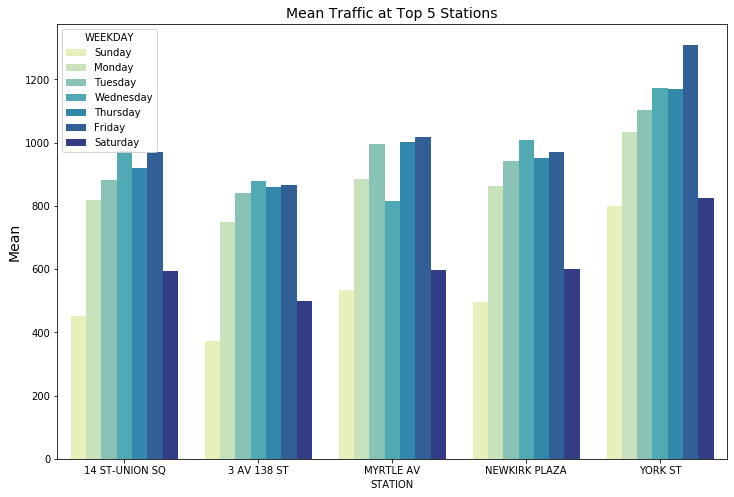

In [46]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'STATION', y='TOTALS', hue='WEEKDAY' , data=top_five_station_weekday, hue_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], palette=("YlGnBu"))
plt.ylabel('Mean', size=14)
plt.title('Mean Traffic at Top 5 Stations', size='14')
plt.co

In [30]:
top_five_station_timebin_friday = top_five_station[top_five_station['WEEKDAY']=='Friday'].groupby(['STATION','TIME']).TOTALS.mean().reset_index()

Text(0.5, 1.0, 'Mean Traffic on Fridays at Top 5 Stations')

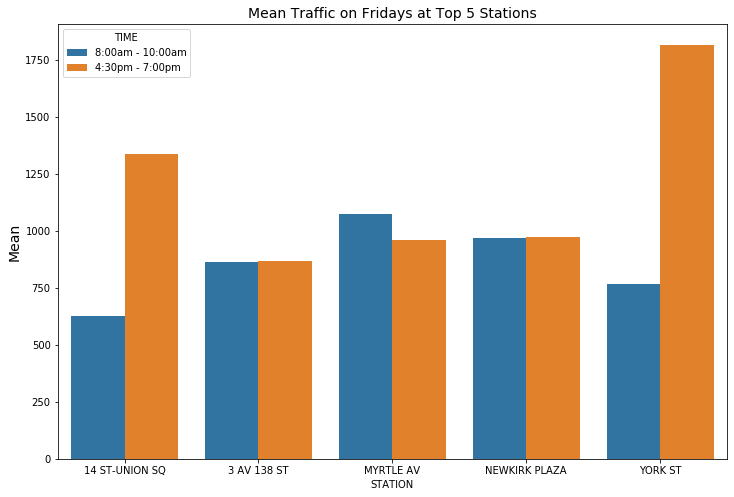

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'STATION', y='TOTALS', hue='TIME' , data=top_five_station_timebin_friday, hue_order=['8:00am - 10:00am','4:30pm - 7:00pm'])
plt.ylabel('Mean', size=14)
plt.title('Mean Traffic on Fridays at Top 5 Stations', size='14')

Text(0.5, 1.0, 'Mean Traffic vs. Day of Week at Top 5 Stations')

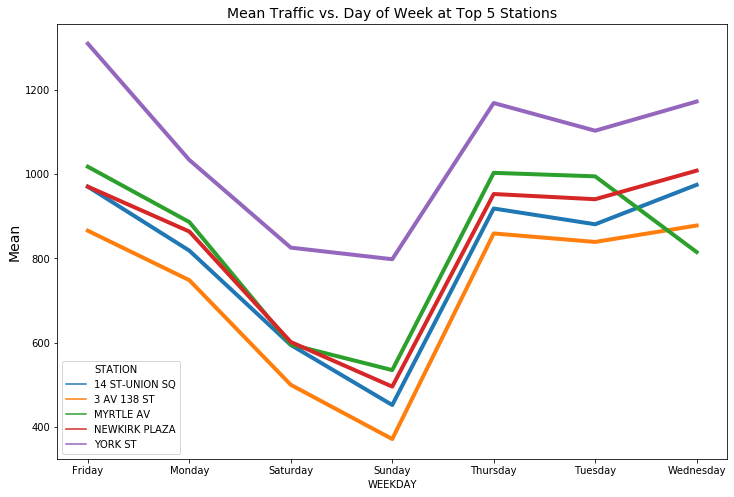

In [44]:
plt.figure(figsize=(12,8))
sns.lineplot(x = 'WEEKDAY', y='TOTALS', hue='STATION' , data=top_five_station_weekday, linewidth = '4')
plt.ylabel('Mean', size=14)
plt.title('Mean Traffic vs. Day of Week at Top 5 Stations', size='14')

In [33]:
station_date_df = new_df[['STATION','TOTALS','DATETIME1']]

In [34]:
station_date_df.head(5)

,STATION,TOTALS,DATETIME1
2,59 ST,48.0,2019-05-25 08:00:00
4,59 ST,294.0,2019-05-25 16:00:00
8,59 ST,17.0,2019-05-26 08:00:00
10,59 ST,223.0,2019-05-26 16:00:00
14,59 ST,46.0,2019-05-27 08:00:00


In [35]:
t5_station_date_df = station_date_df[station_date_df['STATION'].isin(list(station_df[0:5]['STATION']))]

/Users/jaycheong/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Traffic Time Series of Top 5 Stations')

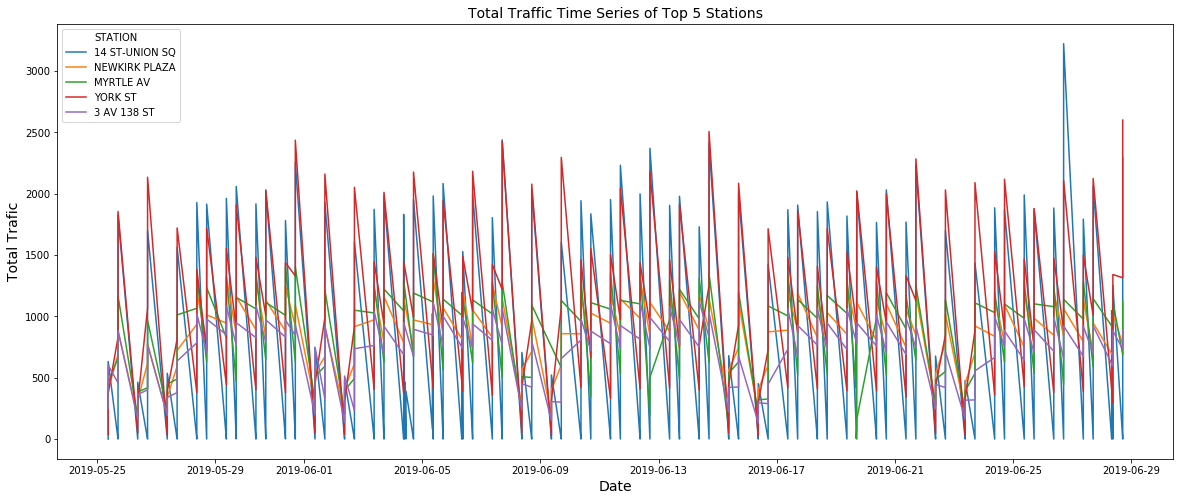

In [36]:
plt.figure(figsize=(20,8))
sns.lineplot(x = 'DATETIME1', y='TOTALS', hue='STATION' , estimator=None, data=t5_station_date_df)
plt.ylabel('Total Trafic', size=14)
plt.xlabel('Date', size=14)
plt.title('Total Traffic Time Series of Top 5 Stations', size='14')